# Ensemble Learning
# using bagging and boosting


In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import datasets


In [2]:
# load the data
data =  datasets.load_iris()



In [3]:
df_x = data.data[:, :2]
df_y = data.target

In [4]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [5]:
#decision tree
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
#test score
dt.score(x_test,y_test)

0.8666666666666667

In [7]:
#train score
dt.score(x_train,y_train)

0.9166666666666666

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 1 2
 2 1]


Text(0.5, 1.0, 'Predicted')

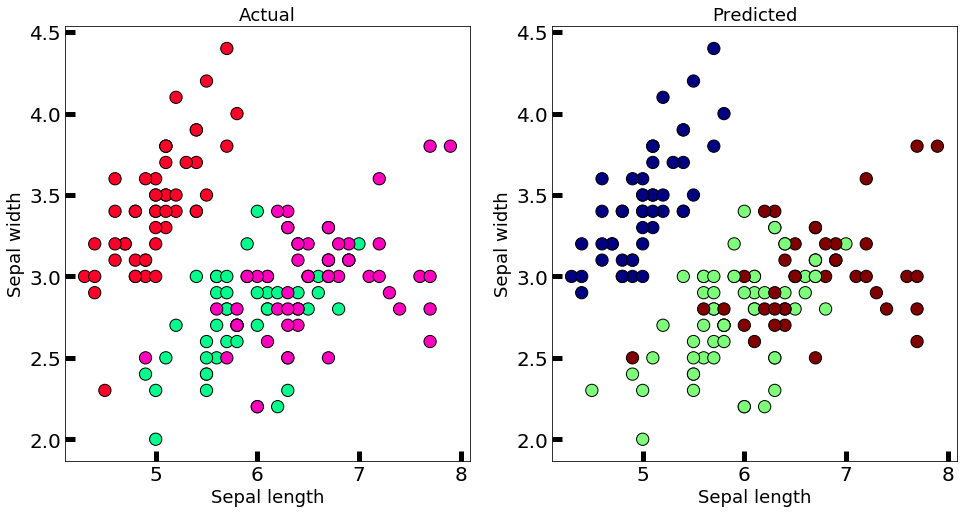

In [8]:
prediction=dt.predict(df_x)
print(prediction)
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df_x[:, 0], df_x[:, 1], c=df_y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(df_x[:, 0], df_x[:, 1], c=prediction, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)


In [9]:
#Random Forest - Ensemble of Decision Trees
#20 Decision tree in prallel 

rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
rf.score(x_test,y_test)

0.8666666666666667

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 2 2 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 1 2
 2 2]


Text(0.5, 1.0, 'Predicted')

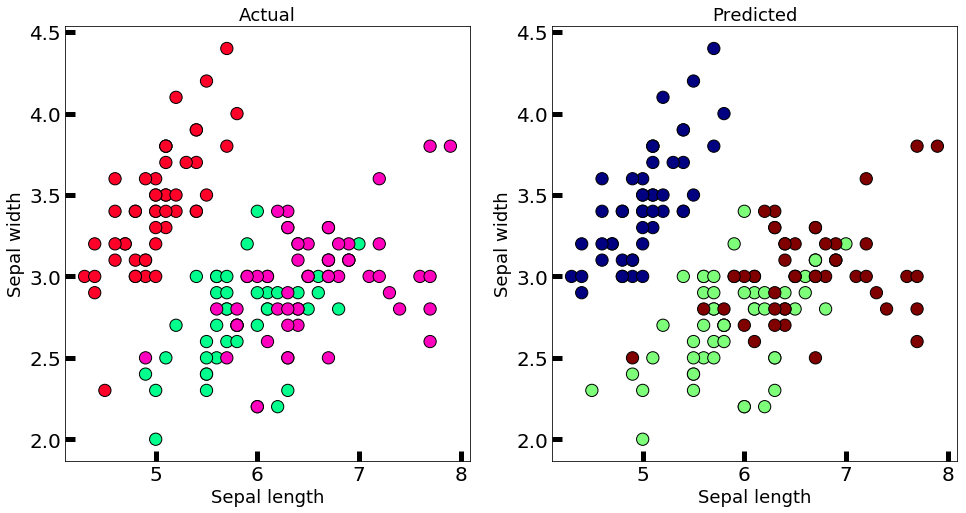

In [11]:
prediction_rf=rf.predict(df_x)
print(prediction_rf)
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df_x[:, 0], df_x[:, 1], c=df_y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(df_x[:, 0], df_x[:, 1], c=prediction_rf, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)


In [24]:
#Bagging 
#max_samples = 50% of the train data is selected randomly
#n_estimators = no of decisison tree ran prallelly
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features = 1.0, n_estimators = 20)
bg.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=20, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [25]:
bg.score(x_test,y_test)

0.9

In [26]:
bg.score(x_train,y_train)

0.8666666666666667

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 2 1 2 1 1 1 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2
 2 1]


Text(0.5, 1.0, 'Predicted')

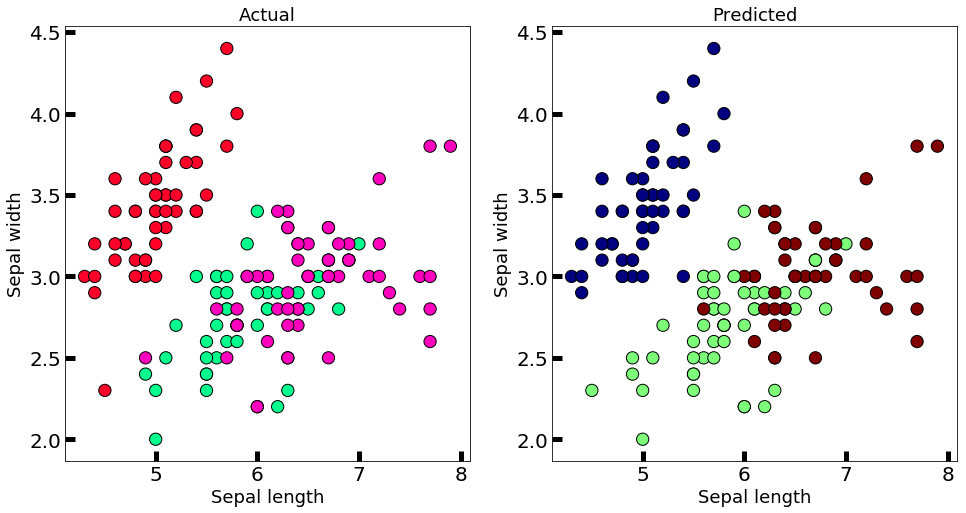

In [15]:
prediction_bg=bg.predict(df_x)
print(prediction_bg)
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df_x[:, 0], df_x[:, 1], c=df_y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(df_x[:, 0], df_x[:, 1], c=prediction_bg, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)


In [16]:
#Boosting - Ada Boost

adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 15, learning_rate = .2)
adb.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.2, n_estimators=15, random_state=None)

In [17]:
adb.score(x_test,y_test)

0.9

In [18]:
adb.score(x_train,y_train)

0.9166666666666666

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 1 2
 2 1]


Text(0.5, 1.0, 'Predicted')

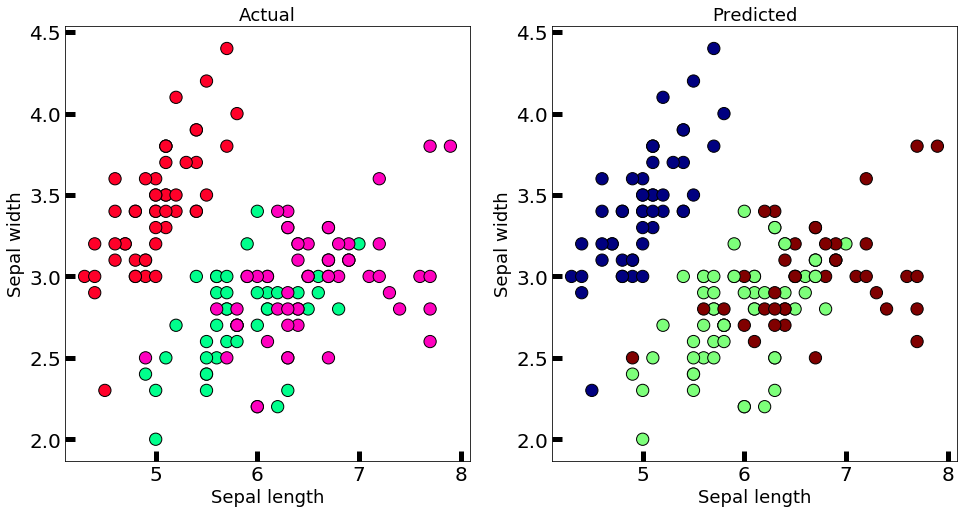

In [30]:
prediction_adb=adb.predict(df_x)
print(prediction_adb)
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df_x[:, 0], df_x[:, 1], c=df_y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(df_x[:, 0], df_x[:, 1], c=prediction_adb, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)


In [19]:
# Voting Classifier - Multiple Model Ensemble 
#own ensemble learning using voting clasiffifier
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel = 'poly', degree = 2 )

In [27]:
evc = VotingClassifier( estimators= [('lr',lr),('dt',dt),('svm',svm)], voting = 'hard')
#voting hard = vote on the lable not the probablity

In [28]:
evc.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('dt', Decision...y', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [29]:
evc.score(x_test, y_test)

0.9

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 2 1 2 1 1 1 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2
 2 1]


Text(0.5, 1.0, 'Predicted')

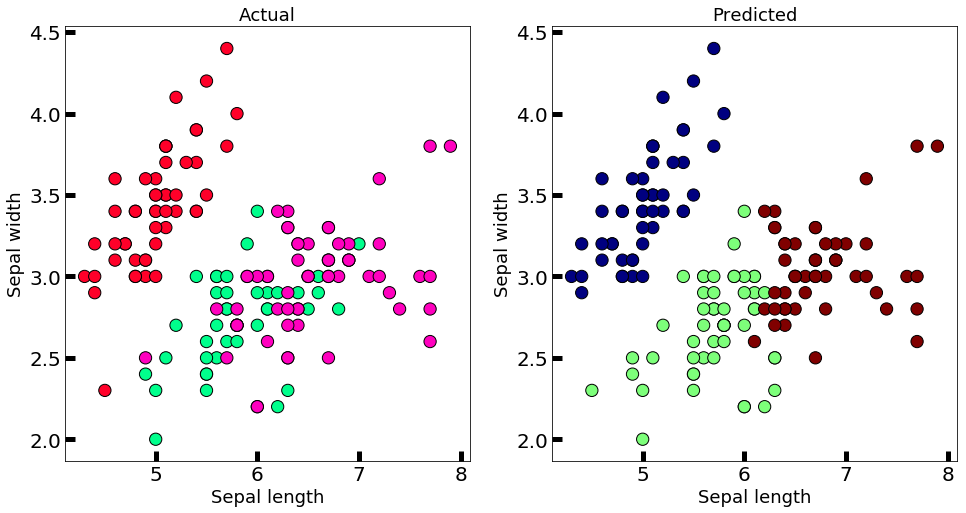

In [31]:
prediction_evc=evc.predict(df_x)
print(prediction_bg)
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df_x[:, 0], df_x[:, 1], c=df_y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(df_x[:, 0], df_x[:, 1], c=prediction_evc, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)
